In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
%matplotlib inline

In [3]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.columns

Index(['Month', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [8]:
df.columns = ['Month', 'Milk in Pounds per Cows']

In [9]:
df.columns

Index(['Month', 'Milk in Pounds per Cows'], dtype='object')

In [11]:
df

,Month,Milk in Pounds per Cows
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [12]:
df.drop(168, axis=0, inplace=True)

In [14]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Milk in Pounds per Cows
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [15]:
df.set_index('Month', inplace= True)

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cows,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


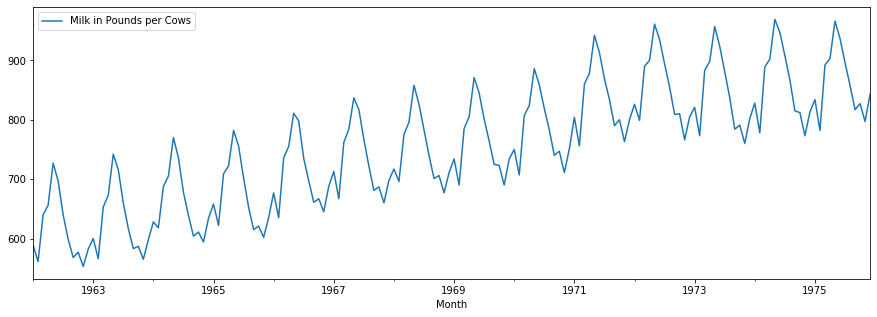

In [18]:
df.plot(figsize=(15,5))

In [19]:
df.columns

Index(['Milk in Pounds per Cows'], dtype='object')

In [20]:
time_series = df['Milk in Pounds per Cows']

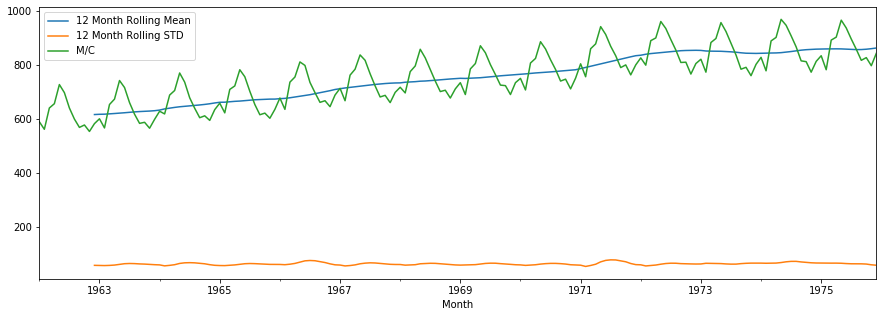

In [28]:
df['Milk in Pounds per Cows'].rolling(12).mean().plot(label='12 Month Rolling Mean')
df['Milk in Pounds per Cows'].rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot(label='M/C',figsize=(15,5))
plt.legend()

In [30]:
decomp = seasonal_decompose(time_series)

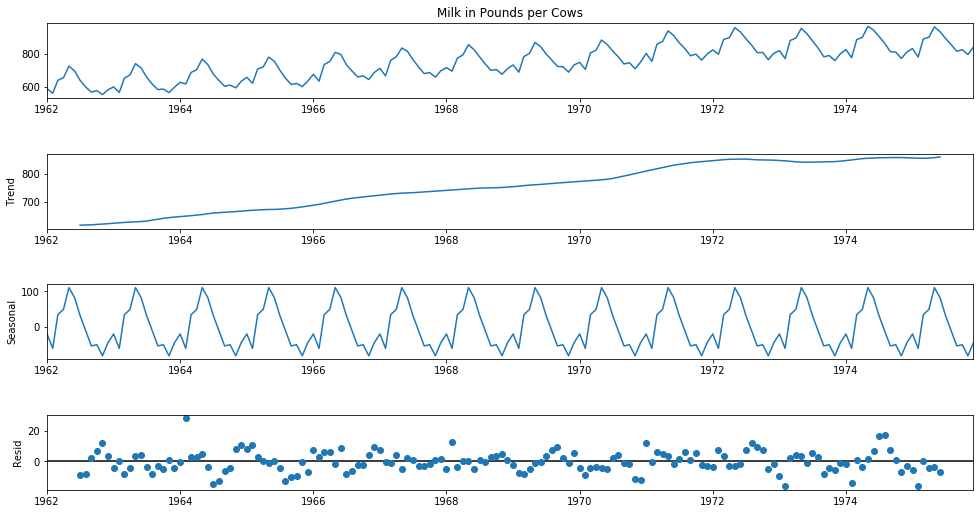

In [33]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [36]:
df.columns

Index(['Milk in Pounds per Cows'], dtype='object')

In [39]:
result = adfuller(df['Milk in Pounds per Cows'])

In [40]:
result

(-1.3038115874221274,
 0.6274267086030326,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [42]:
def adf_check(time_series):
    result = adfuller(time_series)
    print(' Augmented Dicky-Fuller Test')
    labels = ['ADF test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hpothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [43]:
adf_check(time_series)

 Augmented Dicky-Fuller Test
ADF test Statistic : -1.3038115874221274
p-value : 0.6274267086030326
# of lags : 13
Num of Observations used : 154
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [46]:
df['First Difference'] = time_series - time_series.shift(1)
df['First Difference']

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: First Difference, Length: 168, dtype: float64

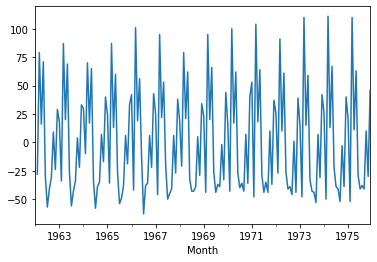

In [45]:
df['First Difference'].plot()

In [49]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF test Statistic : -3.0549955586530575
p-value : 0.030068004001786674
# of lags : 14
Num of Observations used : 152
Strong evidence against null hpothesis
reject null hypothesis
Data has no unit root and is stationary


In [50]:
df['Milk Second Diff'] = df['First Difference'] -df['First Difference'].shift(1)
df['Milk Second Diff']

Month
1962-01-01      NaN
1962-02-01      NaN
1962-03-01    107.0
1962-04-01    -63.0
1962-05-01     55.0
              ...  
1975-08-01      3.0
1975-09-01     -3.0
1975-10-01     51.0
1975-11-01    -40.0
1975-12-01     76.0
Name: Milk Second Diff, Length: 168, dtype: float64

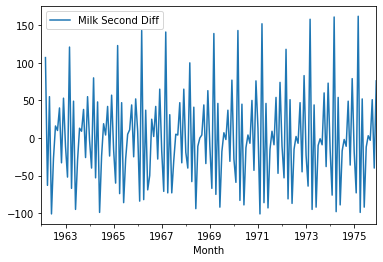

In [64]:
df['Milk Second Diff'].plot(label='Milk Second Diff')
#df['First Difference'].plot(figsize=(15,5), label='First Difference')
plt.legend()

In [52]:
adf_check(df['Milk Second Diff'].dropna())

 Augmented Dicky-Fuller Test
ADF test Statistic : -14.327873645603292
p-value : 1.1126989332085062e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hpothesis
reject null hypothesis
Data has no unit root and is stationary


In [62]:
df.columns

Index(['Milk in Pounds per Cows', 'First Difference', 'Milk Second Diff'], dtype='object')

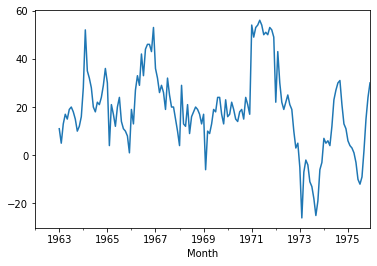

In [63]:
df['Sesonal Difference'] = df['Milk in Pounds per Cows'] - df['Milk in Pounds per Cows'].shift(12)
df['Sesonal Difference'].plot()

In [65]:
adf_check(df['Sesonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF test Statistic : -2.335419314359401
p-value : 0.1607988052771126
# of lags : 12
Num of Observations used : 143
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


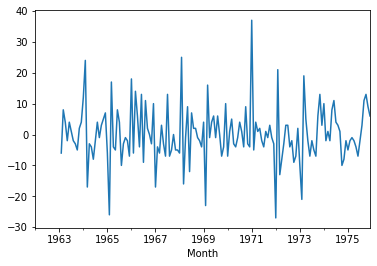

In [66]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [67]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF test Statistic : -5.038002274921981
p-value : 1.865423431878848e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hpothesis
reject null hypothesis
Data has no unit root and is stationary


In [76]:
df.columns = ['Milk in Pounds per Cows', 'First Difference', 'Milk Second Difference',
       'Sesonal Difference', 'Seasonal First Difference']

In [77]:
df

,Milk in Pounds per Cows,First Difference,Milk Second Difference,Sesonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN
...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0
1975-09-01,817.0,-41.0,-3.0,2.0,11.0
1975-10-01,827.0,10.0,51.0,15.0,13.0


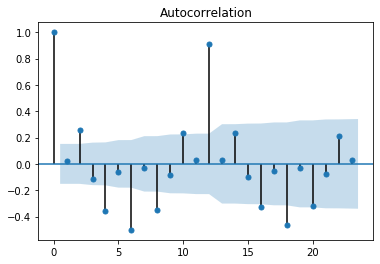

In [78]:
fig_first = plot_acf(df['First Difference'].dropna())

In [80]:
df.columns

Index(['Milk in Pounds per Cows', 'First Difference', 'Milk Second Difference',
       'Sesonal Difference', 'Seasonal First Difference'],
      dtype='object')

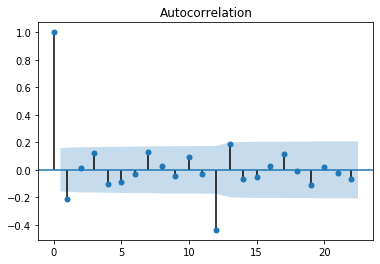

In [89]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

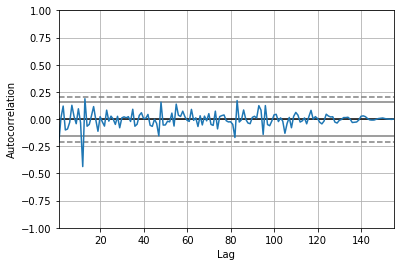

In [85]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

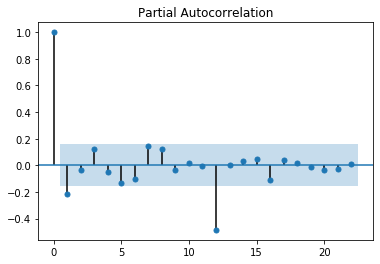

In [91]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

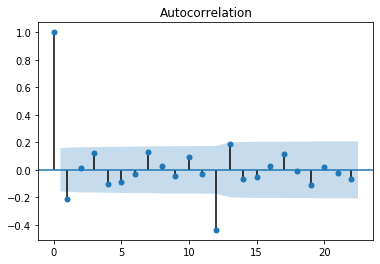

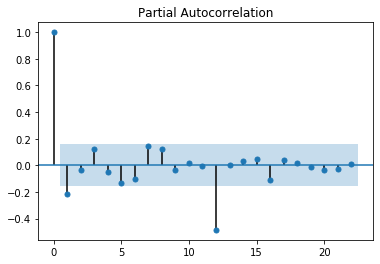

In [95]:
fig1 = plot_acf(df['Seasonal First Difference'].dropna())
fig2 = plot_pacf(df['Seasonal First Difference'].dropna())

In [98]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cows'], order=(0,1,0), seasonal_order=(1,1,1,12))

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [100]:
result = model.fit()

In [101]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:              Milk in Pounds per Cows   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 23 Jun 2020   AIC                           1074.131
Time:                                      14:28:37   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

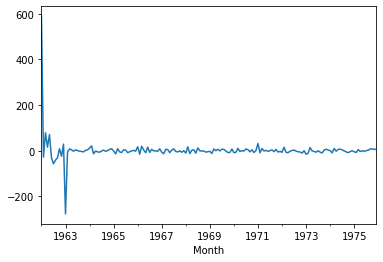

In [103]:
result.resid.plot()

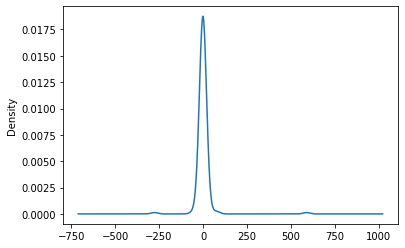

In [105]:
result.resid.plot(kind='kde')

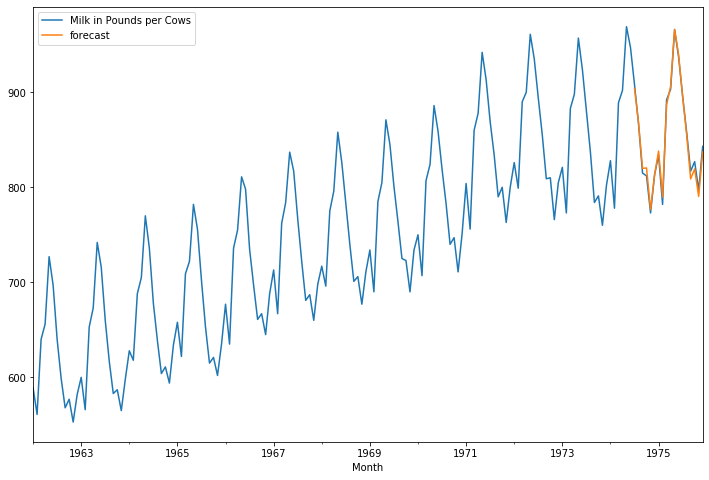

In [110]:
df['forecast'] = result.predict(start=150, end =250)
df.columns
df[['Milk in Pounds per Cows', 'forecast']].plot(figsize=(12,8))

In [111]:
df.tail()

,Milk in Pounds per Cows,First Difference,Milk Second Difference,Sesonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [113]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [114]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [115]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [116]:
future_df

,Milk in Pounds per Cows,First Difference,Milk Second Difference,Sesonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
final_df = pd.concat([df, future_df])

In [119]:
final_df.tail()

,Milk in Pounds per Cows,First Difference,Milk Second Difference,Sesonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
final_df['forecast'] = result.predict(start=168, end=192)

In [121]:
final_df

,Milk in Pounds per Cows,First Difference,Milk Second Difference,Sesonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525868
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918958
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881183
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027296


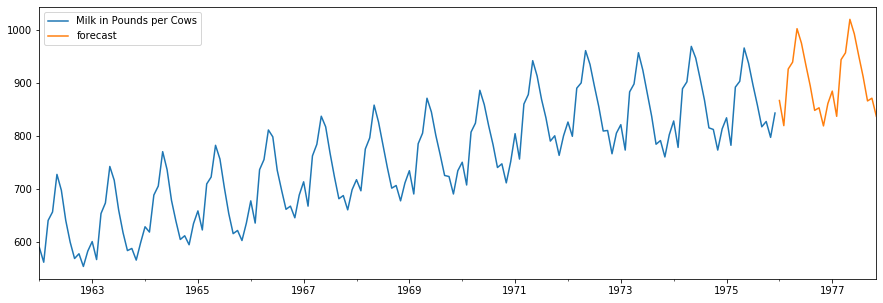

In [123]:
final_df[['Milk in Pounds per Cows', 'forecast']].plot(figsize=(15,5))
